# Dataset preparation for training Abyssal models

This notebook is for

- Dataset filtering
- Train/val/test split

In [1]:
import pandas as pd

## Download and extract files

- Link to MegaDataset Zenodo : https://zenodo.org/record/7401275#.Y6st59JBxD
- K50 dG dataset : https://zenodo.org/record/7401275/files/Processed_K50_dG_datasets.zip?download=1
    - -> We have to download this

In [2]:
!wget https://zenodo.org/record/7401275/files/Processed_K50_dG_datasets.zip -O ../data/Processed_K50_dG_datasets.zip
!unzip ../data/Processed_K50_dG_datasets.zip -d ../data

--2023-02-09 14:52:51--  https://zenodo.org/record/7401275/files/Processed_K50_dG_datasets.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1006084071 (959M) [application/octet-stream]
Saving to: '../data/Processed_K50_dG_datasets.zip'

../data/Processed_K 100%[===================>] 959.48M   242KB/s    in 69m 58s 

2023-02-09 16:02:51 (234 KB/s) - '../data/Processed_K50_dG_datasets.zip' saved [1006084071/1006084071]

Archive:  ../data/Processed_K50_dG_datasets.zip
   creating: Processed_K50_dG_datasets/
  inflating: Processed_K50_dG_datasets/Heat_maps_double_DMS.pdf  
  inflating: Processed_K50_dG_datasets/Triple_DMS_list.csv  
  inflating: Processed_K50_dG_datasets/Single_DMS_list.csv  
  inflating: Processed_K50_dG_datasets/K50_dG_Dataset1_Dataset2.csv  
  inflating: Processed_K50_dG_datasets/K50_Dataset3.csv  
  inflating: Processed_K50_dG_datasets/D

In [7]:
!rm -r Processed_K50_dG_datasets

In [6]:
!unzip ../data/Processed_K50_dG_datasets.zip -d ../data

Archive:  ../data/Processed_K50_dG_datasets.zip
   creating: ../data/Processed_K50_dG_datasets/
  inflating: ../data/Processed_K50_dG_datasets/Heat_maps_double_DMS.pdf  
  inflating: ../data/Processed_K50_dG_datasets/Triple_DMS_list.csv  
  inflating: ../data/Processed_K50_dG_datasets/Single_DMS_list.csv  
  inflating: ../data/Processed_K50_dG_datasets/K50_dG_Dataset1_Dataset2.csv  
  inflating: ../data/Processed_K50_dG_datasets/K50_Dataset3.csv  
  inflating: ../data/Processed_K50_dG_datasets/Double_DMS_list.csv  
  inflating: ../data/Processed_K50_dG_datasets/Heat_maps_single_DMS.pdf  


In [31]:
single = pd.read_csv('../data/Processed_K50_dG_datasets/Single_DMS_list.csv')

In [32]:
single

,name,aa_seq,frac_NA,frac_highconf,frac_lowconf_lowss,frac_lowconf_highdg,raw_corr,dg_corr,slope,y_intercept,width_KT,width_KC,wt_dg_std_max,wt_kt,wt_kc,wt_dg,frac_stabilizing_mut,frac_stabilizing_hydrophobic_mut,frac_pos_with_hydrophobic_stabilzing_muts,wt_d_from_line,DMS_group,WT_cluster
0,EA|run2_0325_0005.pdb,DEVTIHLGDKTIRVDGLDKELLEILKELARRGADEEELRKEIERWER,-0.066194,0.978936,0.000000,0.000000,0.795897,0.897355,0.924574,0.585864,1.799410,1.667615,0.313232,1.247143,1.179462,3.314910,0.159645,0.241270,0.000000,0.076732,G0,EEHH
1,EA|run3_0321_0005.pdb,HDVTIHAGDKTIHVHGASEEFLRIIEQAKRDGIHEEELLRLIEELVK,-0.079196,0.994524,0.000000,0.111111,0.716247,0.869205,0.964459,0.385471,1.654039,1.476803,0.032966,1.399448,1.541773,3.319744,0.144578,0.272446,0.000000,0.134545,G0,EEHH
2,EA|run3_0525_0006.pdb,SHFELRVGTITLHFDNISEELAEELEKLAKNGVHADEIRRWWEEWLK,-0.047281,0.981941,0.000000,0.014815,0.925822,0.939814,1.189631,0.137674,1.649916,1.791146,0.129925,1.453857,1.146686,3.973386,0.188488,0.257962,0.021277,0.068905,G0,EEHH
3,EA|run3_1140_0005.pdb,FHVTIHVGDITFHIHGVSEEEVKKLEELVRRGADWREIKKTIEEIEK,-0.070922,0.998896,0.000000,0.006369,0.907062,0.885406,1.054723,0.720572,1.696218,1.700676,0.103201,1.540460,1.345207,4.030383,0.205298,0.366242,0.000000,0.072771,G0,EEHH
4,EA|run5_0050_0004.pdb,TEVDLHLGDITIKLKDVSEEIVKRAKELFKNGWSAEFVKKWIEEAVK,-0.066194,0.992239,0.000000,0.009063,0.956524,0.960212,1.083691,0.050350,2.096557,2.274312,0.076288,1.767808,1.318278,4.190778,0.200665,0.311111,0.021277,0.110935,G0,EEHH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2M9E.pdb,KLPPGWEKRMFANGTVYYFNHITNASQFERPS,0.149306,0.738776,0.008408,0.000000,0.880768,0.893150,0.903905,0.788703,2.016923,1.999349,0.342628,0.490999,0.052736,3.247773,0.242857,0.318681,0.093750,0.410728,G8,164
979,2M7O.pdb_G38S,MKTQEELTEIVRDHFSDMGEIATLYVQVYESSLESLVSGVIFEDGR...,-0.061111,0.999127,0.000000,0.000000,0.922895,0.941856,1.310385,0.632034,0.955763,1.419743,0.066868,0.144979,-1.052287,1.926132,0.511344,0.807595,0.433333,0.055859,G8,117
980,2KZI.pdb_pross6,NKFNKEMQNAYWEILHLPNLNEEQKNAFIQSLYDDPSQSANLLAEA...,0.005144,0.721820,0.000000,0.600000,0.832259,0.839187,0.946620,-0.057472,1.755171,1.815391,0.000000,1.676971,0.578866,3.192496,0.520165,0.600000,0.092593,0.028704,G8,71
981,2KZI.pdb_pross8,NKFNKEMQNAYYEILHLPNLNEEQKNAFIQSLYDDPSQSANLLAEA...,-0.002058,0.832649,0.000000,0.000000,0.799198,0.831423,0.875908,-0.057259,1.857731,1.800893,0.000000,1.569547,1.185112,3.630498,0.039014,0.046832,0.000000,0.795342,G8,71


- ESM2 (https://github.com/facebookresearch/esm)

## Peek data - full dataset

In [71]:
pd.set_option("display.max_columns", None)
data = pd.read_csv('../data/Processed_K50_dG_datasets/K50_dG_Dataset1_Dataset2.csv')

/data/project/dohoon/miniconda3/envs/dohoon/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (30,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


851,552 aa substitutions were tested in total.

In [72]:
data.shape

(851552, 38)

There are 542 WT proteins in total.

In [73]:
data.WT_name.nunique()

542

## Filtering

Remove records

1. having tag 'unreliable'

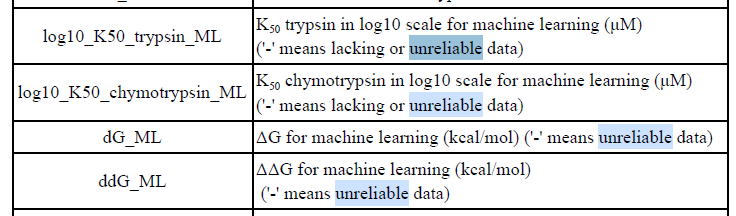

2. when no mutation was introduced
3. associated with insertions and/or deletions
4. associated with multiple mutations

-> 376,918 single mutations from 396 proteins, we call this dataset 'Mega' dataset

In [74]:
# 1. should not have tag 'unreliable'
mask1 = data.ddG_ML != '-'

# 2. mut_type != 'wt'
mask2 = data.mut_type != 'wt'

# 3. Should not be associated with insertions and/or deletions
mask3 = ~data.mut_type.str.contains('ins') & ~data.mut_type.str.contains('del')

# 4. Should have single mutations
mask4 = ~data.mut_type.str.contains(':')

(mask1 & mask2 & mask3 & mask4).sum()

376918

In [88]:
mega = data[mask1 & mask2 & mask3 & mask4].reset_index(drop=True).copy()

# The effect of mutation from the column "ddG_ML" was multiplied by -1 to convert the values into folding free energy changes
# (negative values denote stabilization)
mega['ddG_ML'] = mega['ddG_ML'].astype(float) * (-1)

# Positions
mega['pos'] = mega['mut_type'].str[1:-1].astype(int)

# aa_mut
mega['aa_mut'] = mega['mut_type'].str[-1]

Finally, we have 396 proteins in Mega dataset.

In [89]:
mega.WT_name.nunique()

396

## Train/val/test split

First we have to reconstruct wt sequence of 396 proteins

In [90]:
def reconstruct_wt_seq(aa_seq, mut_type):
    ref, pos, alt = mut_type[0], int(mut_type[1:-1]), mut_type[-1]
    assert aa_seq[pos-1] == alt
    
    tmp = list(aa_seq)
    tmp[pos-1] = ref
    return ''.join(tmp)

In [91]:
wt_seqs = []
for r in mega.to_records():
    s = reconstruct_wt_seq(r.aa_seq, r.mut_type)
    wt_seqs.append(s)
    
len(set(wt_seqs))

396

In [92]:
mega['wt_seq'] = wt_seqs

In [93]:
mega.to_csv('../data/mega.full.csv', index=False)

In [94]:
mega = pd.read_csv('../data/mega.full.csv')

### Making fasta files for 396 aa sequences.

In [9]:
from Bio import SeqIO
from Bio.Seq import Seq

records = {}
for r in mega.to_records():
    name = r.WT_name
    if name not in records:
        records[name] = SeqIO.SeqRecord(Seq(r.wt_seq), id=name, name=name, description='')
    
with open('../data/wt_proteins.fasta', 'w') as outFile:
    SeqIO.write(list(records.values()), outFile, 'fasta')

In [10]:
!head -n3 ../data/wt_proteins.fasta

>1GYZ.pdb
WIARINAAVRAYGLNYSTFINGLKKAGIELDRKILADMAVRDPQAFEQVVNKVKEALQV
>1MHN.pdb


In [11]:
!cat ../data/wt_proteins.fasta | grep '>' | wc -l

396


### all-against-all protein BLAST

You need BLAST to be installed in your machine.

In [ ]:
# !makeblastdb -in ../data/wt_proteins.fasta -dbtype prot -out ../data/wt_proteins
# !blastp -db ../data/wt_proteins -query ../data/wt_proteins.fasta -outfmt 6 -out ../data/wt_proteins.all_against_all_blastp.tsv -num_threads 4

BLAST result

In [12]:
blast_outfmt6_cols = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

blast = pd.read_csv('../data/wt_proteins.all_against_all_blastp.tsv', sep='\t', names=blast_outfmt6_cols)
blast = blast[blast.qseqid != blast.sseqid]
print(len(blast), 'hits in total.')

blast = blast[blast.evalue < 1e-5]
print(len(blast), 'hits with e < 1e-5.')

11621 hits in total.
3400 hits with e < 1e-5.


### Split MegaTrain and MegaValidation with sequence identity cutoff 35

- MegaTrain and MegaValidation should have 388 and 8 proteins, respectively.

In [5]:
blast_identity35 = blast[blast.pident > 35.0]
blast_identity35.shape

(2665, 12)

There are only 293 proteins in BLAST result (e < 1e-5, identity > 35%).

How about the rest of 103 proteins?

In [23]:
import networkx as nx

In [34]:
names = list(records.keys())
name2i = {n:i for i, n in enumerate(names)}
i2name = {i:n for i, n in enumerate(names)}

edgelist = [(name2i[r.qseqid], name2i[r.sseqid]) for r in blast_identity35.to_records()]
G = nx.from_edgelist(edgelist)

In [27]:
nx.number_connected_components(G)

37

In [32]:
mega.shape

(376918, 39)

No 8-member cluster has 9060 mutations tested in total :(

In [35]:
for g in nx.connected_components(G):
    if len(g) == 8:
        members = [i2name[i] for i in g]
        print(members)
        print(len(mega[mega.WT_name.isin(members)]))

['1CSQ.pdb_F49A', '2LSS.pdb_G6S', '2LSS.pdb_F17A', '1MJC.pdb_L43S', '1MJC.pdb_G17A', '1CSQ.pdb_F9S', '2LXK.pdb_G4A', '2LXK.pdb_F15S']
10029
['2L9R.pdb', '2L7M.pdb', '2L7F.pdb', '5Z2S.pdb', '1ENH.pdb', '2JWT.pdb', '2M0C.pdb', '6FVC.pdb']
7081


### We have no sufficient information to reproduce MegaTrain and MegaValidation

But I'll anyway try to reproduce 367858 / 9060 split based on `blast_identity35` data table I've made.

In [57]:
pairs = []

for g in nx.connected_components(G):
    if len(g) < 8:
        members = [i2name[i] for i in g]
        pairs.append((len(members), len(mega[mega.WT_name.isin(members)]), members))
        
for singleton in names:
    if name2i[singleton] in set(G.nodes):
        continue
    
    pairs.append((1, len(mega[mega.WT_name == singleton]), [singleton]))

No two clusters have 8 proteins and 9060 corresponding mutations!

In [58]:
import itertools

for p1, p2 in itertools.combinations(pairs, 2):
    if p1[0] + p2[0] == 8 and p1[1] + p2[1] == 9060:
        print(p1, p2)

How about 3?

In [59]:
for p in itertools.combinations(pairs, 3):
    if sum(t[0] for t in p) == 8 and sum(t[1] for t in p) == 9060:
        print(p)

((6, 6573, ['1YU5.pdb', 'v2R14S|R16S_2L3X.pdb', '1VII.pdb', '5VNT.pdb', '3MYC.pdb', '2RJV.pdb']), (1, 1121, ['1GYZ.pdb']), (1, 1366, ['1UFM.pdb']))
((6, 6573, ['1YU5.pdb', 'v2R14S|R16S_2L3X.pdb', '1VII.pdb', '5VNT.pdb', '3MYC.pdb', '2RJV.pdb']), (1, 1364, ['2LT1.pdb']), (1, 1123, ['2RU9.pdb']))
((6, 6573, ['1YU5.pdb', 'v2R14S|R16S_2L3X.pdb', '1VII.pdb', '5VNT.pdb', '3MYC.pdb', '2RJV.pdb']), (1, 1232, ['2KFV.pdb']), (1, 1255, ['2JT1.pdb']))
((4, 5029, ['2AMI.pdb', '2RRT.pdb', '2K2A.pdb', '2M8U.pdb']), (3, 3074, ['6EWU.pdb', '6EWT.pdb', '6EWS.pdb']), (1, 957, ['2MYX.pdb']))
((4, 4769, ['2LYR.pdb', '2LYP.pdb_V26S', '2LYP.pdb_P41A', '2LYQ.pdb']), (3, 3488, ['2LO1.pdb', '2LGW.pdb', '2OCH.pdb']), (1, 803, ['HEEH_KT_rd6_0007.pdb']))
((6, 7046, ['2KRS.pdb_W42A', '2KRS.pdb_Y53S', '2KT8.pdb_G54S', '2KT8.pdb_V15A', '2KYB.pdb_K55A', '2KYB.pdb_G2S']), (1, 1017, ['7JJK.pdb']), (1, 997, ['v2_2LXE.pdb']))
((6, 7046, ['2KRS.pdb_W42A', '2KRS.pdb_Y53S', '2KT8.pdb_G54S', '2KT8.pdb_V15A', '2KYB.pdb_K55A', 

I'll use the first one for MegaValidation / MegaTest PDB names. Let's finalize our dataset.

In [95]:
val_test_names = ['1YU5.pdb', 'v2R14S|R16S_2L3X.pdb', '1VII.pdb', '5VNT.pdb', '3MYC.pdb', '2RJV.pdb'] + ['1GYZ.pdb'] + ['1UFM.pdb']
train_names = [n for n in names if n not in val_test_names]

mega_val_test = mega[mega.WT_name.isin(val_test_names)]
mega_train = mega[mega.WT_name.isin(train_names)]

mega_val = mega_val_test.sample(frac=1.0, random_state=42).iloc[:3017]
mega_test = mega_val_test.sample(frac=1.0, random_state=42).iloc[3017:]

mega_val_test.shape, mega_train.shape, mega_val.shape, mega_test.shape

((9060, 41), (367858, 41), (3017, 41), (6043, 41))

367,858 for MegaTrain, 3017 for MegaValidation, 6043 for MegaTest. OK!

In [96]:
mega_train.to_csv('../data/mega.train.csv', index=False)
mega_val.to_csv('../data/mega.val.csv', index=False)
mega_test.to_csv('../data/mega.test.csv', index=False)